# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the data

In [2]:
df2 = pd.read_csv(r"C:\Users\dhara\Downloads\archive (8)\IMDb Movies India.csv", encoding = "latin1")

# Explore the data

In [3]:
df2.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df2.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df2.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df2.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# Clean the data

In [8]:
#Fill missing values for categorical columns with 'Unknown'
df2['Genre'].fillna('Unknown', inplace=True)
df2['Director'].fillna('Unknown', inplace=True)
df2['Actor 1'].fillna('Unknown', inplace=True)
df2['Actor 2'].fillna('Unknown', inplace=True)
df2['Actor 3'].fillna('Unknown', inplace=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     15509 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
df2['Year'] = df2['Year'].str.extract('(\d{4})').astype(float)

In [11]:
df2['Duration'] = df2['Duration'].str.replace(' min', '').astype(float)

In [12]:
# Convert 'Votes' to numerical format and fill missing values with median
df2['Votes'] = df2['Votes'].str.replace(',', '').str.replace('$', '').str.replace('M', '').astype(float)
df2['Votes'].fillna(df2['Votes'].median(), inplace=True)

C:\Users\dhara\AppData\Local\Temp\ipykernel_2488\946206935.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Votes'] = df2['Votes'].str.replace(',', '').str.replace('$', '').str.replace('M', '').astype(float)


In [13]:
df2.isnull().sum()

Name           0
Year         528
Duration    8269
Genre          0
Rating      7590
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [14]:
df2.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,55.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,55.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,55.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [15]:
# Drop rows with missing Rating
df2.dropna(subset=['Rating'], inplace=True)

In [16]:
df2.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Data Visualization and Analysis

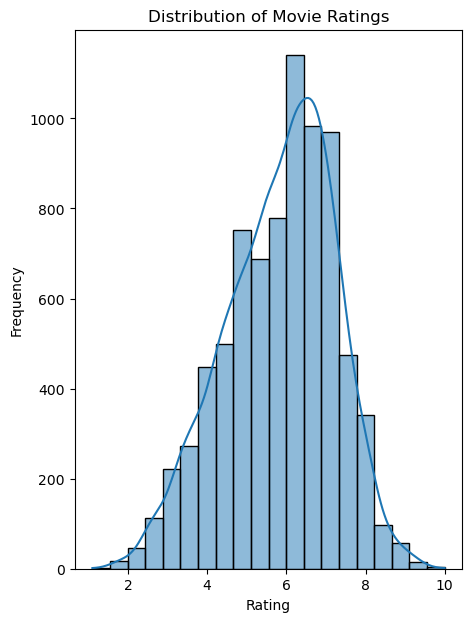

In [17]:
plt.figure(figsize=(5,7))
sns.histplot(df2['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Identify the most frequent rating values. 

Here, the peak is around 7, it suggests that many movies are rated around 7.

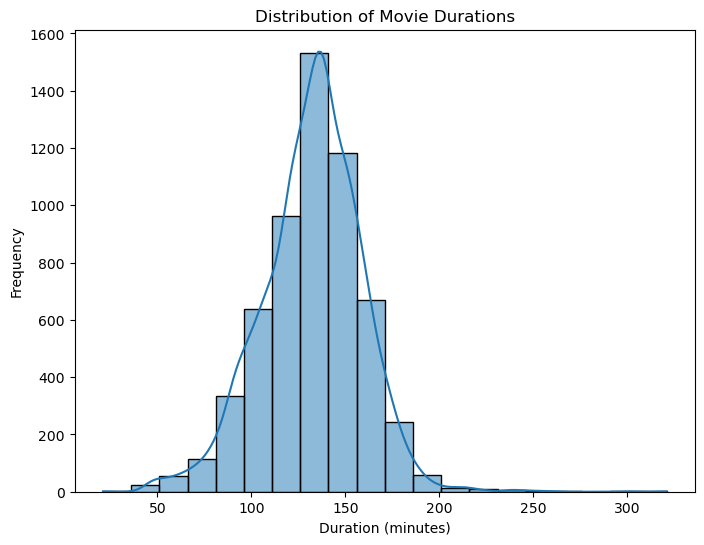

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df2['Duration'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Identify the most frequent duration values. 

Here the peak is around 120 minutes, it suggests that many movies are around two hours long.

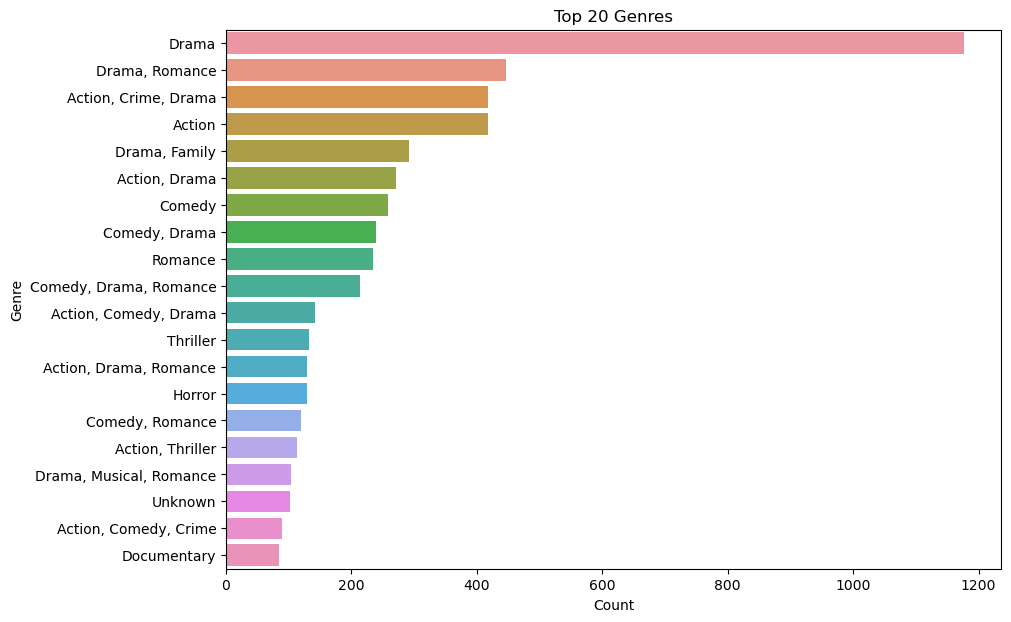

In [19]:
plt.figure(figsize=(10, 7))
top_genres = df2['Genre'].value_counts().head(20)
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title('Top 20 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

The top bar represents the genre with the highest count of movies.

"Drama" is at the top with the longest bar, it indicates that there are more drama movies in the dataset than any other genre.

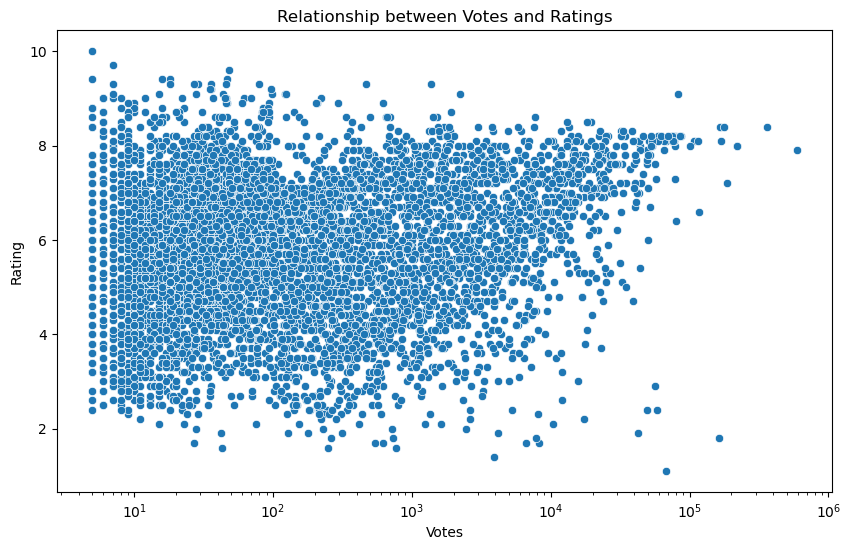

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Votes', y='Rating')
plt.title('Relationship between Votes and Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log') 
plt.show()

A noticeable cluster in the top right corner (high votes, high ratings) suggests popular movies tend to be well-received.

A spread of points in the middle vote range with varied ratings might indicate that mid-popularity movies receive mixed reviews.

For movies with low votes, the ratings can be widely varied, indicating less consensus among a smaller audience.

C:\Users\dhara\AppData\Local\Temp\ipykernel_2488\3534208593.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


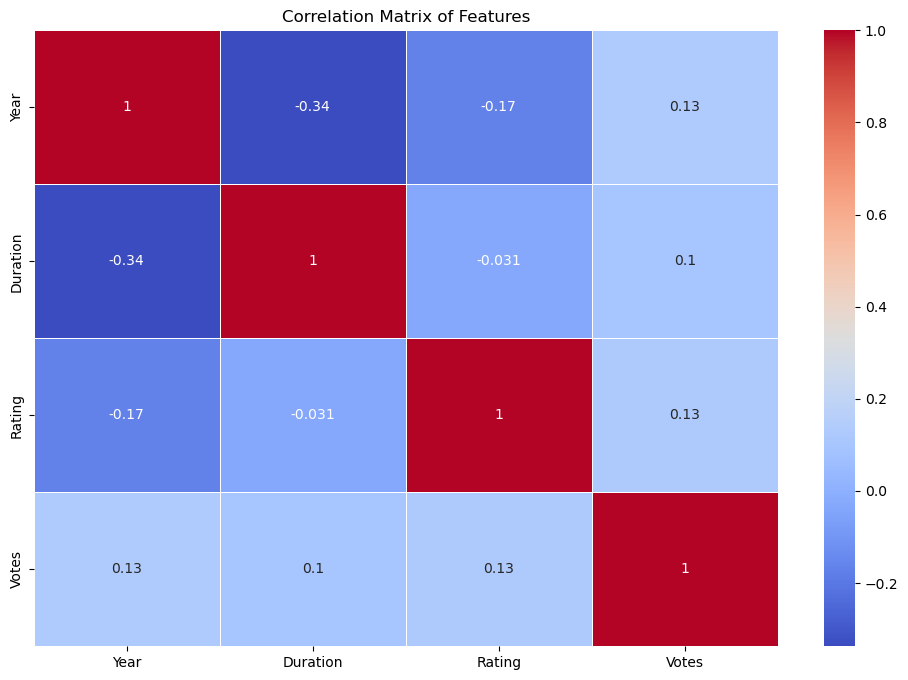

In [40]:
plt.figure(figsize=(12, 8))
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

If two variables have a correlation close to 1, they are strongly positively correlated. This means that as one variable increases, the other also increases. For example, if Votes and Rating have a strong positive correlation, movies with more votes tend to have higher ratings.

If two variables have a correlation close to -1, they are strongly negatively correlated. This means that as one variable increases, the other decreases. For example, if Duration had a strong negative correlation with Rating, it would mean that longer movies tend to have lower ratings.

If the correlation is close to 0, it suggests that there is no linear relationship between the variables. For example, if Year and Rating have a correlation close to 0, the release year of a movie does not have a significant linear relationship with its rating.

# Split the data into train and test

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [22]:
X = df2[['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
y = df2['Rating']

In [25]:
df_encoded = pd.get_dummies(df2, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42) 

# LinearRegression model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
X_train = X_train.fillna(0).apply(pd.to_numeric, errors='coerce') # Fill NaNs with 0 
X_test = X_test.fillna(0).apply(pd.to_numeric, errors='coerce')  # Fill NaNs with 0

model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
y_pred

array([3.30011774, 5.30000822, 5.69985496, ..., 4.5       , 4.9999912 ,
       8.60000586])

# Model Evaluation

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mae

4.561952650811808e-05

In [37]:
mse = mean_squared_error(y_test, y_pred)
mse

2.6642339753346263e-08

In [39]:
r2 = r2_score(y_test, y_pred)
r2

0.9999999856695752

In the context of regression models, "accuracy" is typically not the best metric to evaluate performance since it's more commonly used for classification tasks. 

Instead, regression models are often evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

Here r2 is 0.99 which indicates that the regression predictions perfectly fit the data.